In [105]:
!pip install keras==2.2.4
!pip install tensorflow==1.13.1

ERROR: Could not find a version that satisfies the requirement tensorflow==1.13.1 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0)
ERROR: No matching distribution found for tensorflow==1.13.1


In [106]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [107]:
# загрузим (загрузить при необходимости) набор данных MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

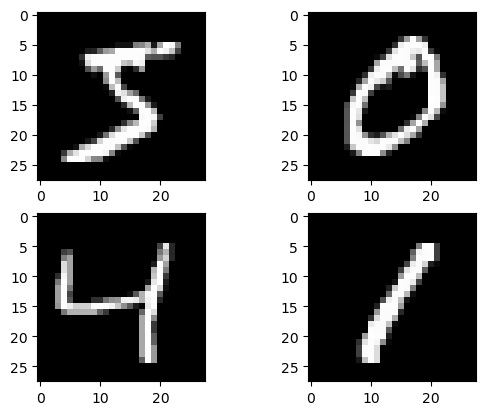

In [108]:
# чертим 4 изображения в сером оттенке
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

# показ чертежа
plt.show()

In [109]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [110]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [111]:
X_train = X_train / 255
X_test = X_test / 255

In [112]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [113]:
def baseline_model():
  # создаем модель
  model = Sequential()
  model.add(Dense(num_pixels,input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
  model.add(Dense(num_classes,kernel_initializer='normal', activation='softmax'))
  model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
  return model

In [115]:
model = baseline_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10,
batch_size=200, verbose=2)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 10s - loss: 0.2802 - accuracy: 0.9213 - val_loss: 0.1399 - val_accuracy: 0.9568 - 10s/epoch - 34ms/step
Epoch 2/10
300/300 - 7s - loss: 0.1102 - accuracy: 0.9684 - val_loss: 0.0934 - val_accuracy: 0.9713 - 7s/epoch - 24ms/step
Epoch 3/10
300/300 - 7s - loss: 0.0711 - accuracy: 0.9798 - val_loss: 0.0775 - val_accuracy: 0.9750 - 7s/epoch - 24ms/step
Epoch 4/10
300/300 - 6s - loss: 0.0505 - accuracy: 0.9852 - val_loss: 0.0695 - val_accuracy: 0.9772 - 6s/epoch - 20ms/step
Epoch 5/10
300/300 - 6s - loss: 0.0358 - accuracy: 0.9902 - val_loss: 0.0646 - val_accuracy: 0.9800 - 6s/epoch - 21ms/step
Epoch 6/10
300/300 - 9s - loss: 0.0257 - accuracy: 0.9931 - val_loss: 0.0630 - val_accuracy: 0.9805 - 9s/epoch - 32ms/step
Epoch 7/10
300/300 - 7s - loss: 0.0192 - accuracy: 0.9952 - val_loss: 0.0555 - val_accuracy: 0.9820 - 7s/epoch - 23ms/step
Epoch 8/10
300/300 - 7s - loss: 0.0147 - accuracy: 0.9965 - val_loss: 0.0576 - val_accuracy: 0.9820 - 7s/epoch - 23ms/step
Epoch 9/10
300

In [139]:

import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
# метод set_image_dim_ordering() имеется в старой версии 
# keras==2.2.4 и tensorflow==1.13.1

In [140]:
seed = 7
numpy.random.seed(seed)

In [141]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# изменить форму на [образцы][пиксели][ширина][высота]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [142]:
X_train = X_train / 255
X_test = X_test / 255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

(10000, 28, 28, 1)

In [6]:
from keras.models import Sequential
def baseline_model():
#     # создаем модель
#     model = Sequential()
#     model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.2))
#     model.add(Flatten())
#     model.add(Dense(128, activation='relu'))
#     model.add(Dense(num_classes, activation='softmax'))
#     # скомпилируем модель
#     model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    
    
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    # Компилируем модель
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [7]:
model = baseline_model()
# model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

AttributeError: module 'tensorflow' has no attribute 'get_default_graph'

In [ ]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K


In [ ]:
K.set_image_dim_ordering('th')
seed = 7
numpy.random.seed(seed)

# загрузим данные
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# изменим форму на [образцы] [пиксели] [ширина] [высота]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

# нормализуем входы от 0-255 до 0-1
X_train = X_train / 255
X_test = X_test / 255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [ ]:
def larger_model():
  # создаем модель
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  return model

In [ ]:
model = larger_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

In [3]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils

# установка seed для повторяемости результатов
np.random.seed(42)

# загрузка данных
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# предобработка данных
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# создание модели
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# обучение модели
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, y_test))

# оценка качества модели на тестовых данных
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


AttributeError: module 'tensorflow' has no attribute 'get_default_graph'